In [ ]:
import os
import cv2
import numpy as np
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, Rotate, RandomBrightnessContrast,
    GaussNoise, RandomResizedCrop
)
import shutil
from tqdm import tqdm

# Define the input and output directories
input_dir = '/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL' 
output_dir = '/kaggle/working/augmented_thermal_images'

# Create augmentation pipeline
def get_augmentation():
    return Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        Rotate(limit=45, p=0.5),
        RandomBrightnessContrast(p=0.5),
        GaussNoise(p=0.3),
        RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.5)
    ])

# Function to create augmented images
def augment_images(image_path, save_dir, num_augmentations=5):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        return
    
    # Get file name
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    # Create augmentations
    augmentation = get_augmentation()
    
    # Save original image
    cv2.imwrite(os.path.join(save_dir, filename), image)
    
    # Create and save augmented images
    for i in range(num_augmentations):
        augmented = augmentation(image=image)['image']
        aug_filename = f"{name}_aug_{i}{ext}"
        cv2.imwrite(os.path.join(save_dir, aug_filename), augmented)

# Main processing
def process_dataset():
    # Create output directory
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)
    
    # Dictionary to store counts
    image_counts = {}
    
    # Process each class folder
    for class_name in ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']:
        # Create class directory in output
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir)
        
        # Get input class directory
        class_input_dir = os.path.join(input_dir, class_name)
        
        # Process images in class directory
        image_files = [f for f in os.listdir(class_input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"Processing {class_name}...")
        for image_file in tqdm(image_files):
            image_path = os.path.join(class_input_dir, image_file)
            augment_images(image_path, class_output_dir)
        
        # Count augmented images
        augmented_count = len(os.listdir(class_output_dir))
        image_counts[class_name] = augmented_count
        print(f"{class_name}: {augmented_count} images")
    
    return image_counts

# Run the processing
if __name__ == "__main__":
    print("Starting augmentation process...")
    final_counts = process_dataset()
    
    print("\nFinal image counts after augmentation:")
    for class_name, count in final_counts.items():
        print(f"{class_name}: {count} images")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Starting augmentation process...
Processing BLB...


100%|██████████| 220/220 [00:06<00:00, 36.13it/s]


BLB: 1320 images
Processing Blast...


100%|██████████| 67/67 [00:01<00:00, 39.99it/s]


Blast: 402 images
Processing healthy...


100%|██████████| 93/93 [00:02<00:00, 36.26it/s]


healthy: 558 images
Processing hispa...


100%|██████████| 142/142 [00:03<00:00, 36.11it/s]


hispa: 852 images
Processing leaf folder...


100%|██████████| 34/34 [00:00<00:00, 35.73it/s]


leaf folder: 204 images
Processing leaf spot...


100%|██████████| 80/80 [00:02<00:00, 36.29it/s]

leaf spot: 480 images

Final image counts after augmentation:
BLB: 1320 images
Blast: 402 images
healthy: 558 images
hispa: 852 images
leaf folder: 204 images
leaf spot: 480 images


Found 3816 files belonging to 6 classes.
Using 3053 files for training.
Found 3816 files belonging to 6 classes.
Using 763 files for validation.
Train batch shapes: (32, 224, 224, 3) (32, 6)
Validation batch shapes: (32, 224, 224, 3) (32, 6)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 54, 54, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 46,806,790 (178.55 MB)

 Trainable params: 46,789,190 (178.49 MB)

 Non-trainable params: 17,600 (68.75 KB)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - accuracy: 0.3084 - loss: 2.1213 - val_accuracy: 0.3342 - val_loss: 2.6613 - learning_rate: 1.0000e-04
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.4680 - loss: 1.6684 - val_accuracy: 0.0564 - val_loss: 4.4109 - learning_rate: 1.0000e-04
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 161ms/step - accuracy: 0.5024 - loss: 1.5241 - val_accuracy: 0.1376 - val_loss: 6.5902 - learning_rate: 1.0000e-04
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.5849 - loss: 1.3159 - val_accuracy: 0.1769 - val_loss: 4.7171 - learning_rate: 1.0000e-04
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.5904 - loss: 1.2077 - val_accuracy: 0.2477 - val_loss: 3.4284 - learning_rate: 1.0000e-04
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.5904 - loss: 1.2235 - val_accuracy: 0.3827 - val_loss: 2.4160 - learning_rate: 1.0000e-04
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/ste

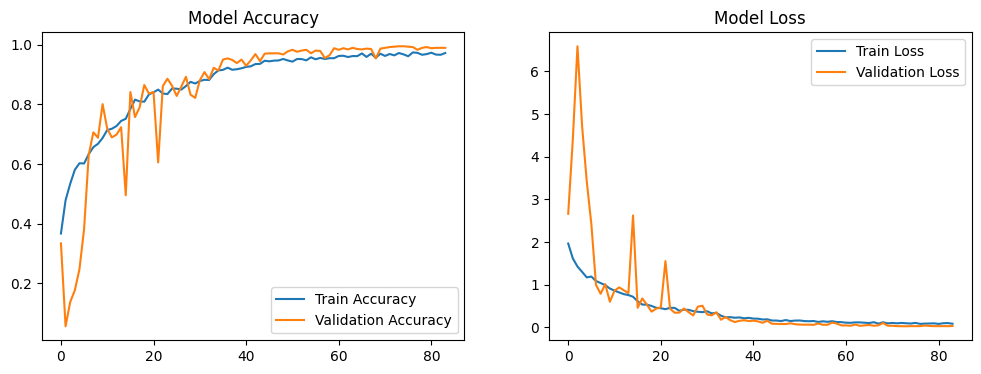

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization, Conv2D, 
                                     MaxPooling2D, Flatten, Input, Lambda, Rescaling)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# =============================
# 1. Dataset Setup and Preprocessing
# =============================

# Set dataset directory
dataset_dir = "/kaggle/working/augmented_thermal_images"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Create tf.data.Datasets for training and validation
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='categorical'
)

# Data augmentation: rotations, zoom, flips and contrast adjustments
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomContrast(0.2),
])

# Apply data augmentation to training data and prefetch for performance
train_ds = train_ds.map(
    lambda x, y: (augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# Debug: Inspect dataset shapes
for images, labels in train_ds.take(1):
    print("Train batch shapes:", images.shape, labels.shape)
for images, labels in val_ds.take(1):
    print("Validation batch shapes:", images.shape, labels.shape)

# =============================
# 2. Build the AlexNet-Style Model
# =============================

inputs = Input(shape=(224, 224, 3))

# Normalize pixel values to [0, 1]
x = Rescaling(1./255)(inputs)

# First Convolutional Block
x = Conv2D(96, kernel_size=11, strides=4, padding='valid', activation='relu')(x)
# Local Response Normalization (LRN) mimicking original AlexNet
x = Lambda(lambda x: tf.nn.local_response_normalization(
    x, depth_radius=2, bias=2, alpha=1e-4, beta=0.75))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = BatchNormalization()(x)

# Second Convolutional Block
x = Conv2D(256, kernel_size=5, padding='same', activation='relu')(x)
x = Lambda(lambda x: tf.nn.local_response_normalization(
    x, depth_radius=2, bias=2, alpha=1e-4, beta=0.75))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = BatchNormalization()(x)

# Third Convolutional Block
x = Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)

# Fourth Convolutional Block
x = Conv2D(384, kernel_size=3, padding='same', activation='relu')(x)

# Fifth Convolutional Block
x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)
x = BatchNormalization()(x)

# Flatten before the dense layers
x = Flatten()(x)

# First Dense Block
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)  # Increased dropout to 0.5
x = BatchNormalization()(x)

# Second Dense Block
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)  # Increased dropout to 0.5
x = BatchNormalization()(x)

# Output layer for 6 classes
outputs = Dense(6, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model with a higher learning rate
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary for verification
model.summary()

# =============================
# 3. Set Up Callbacks and Train the Model
# =============================

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_alexnet.keras", monitor='val_accuracy', save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=callbacks
)

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the final model
model.save("thermal_disease_alexnet.keras")

# =============================
# 4. Plot Training History
# =============================

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


# accuracy 0.9948
